In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

training_set = train_datagen.flow_from_directory(
        '/kaggle/input/brain-tumour-dataset/Dataset/Training',
        target_size=(32, 32),
        batch_size=32,
        color_mode='grayscale',
        class_mode='categorical')

Found 5712 images belonging to 4 classes.


In [37]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_set = validation_datagen.flow_from_directory(
        '/kaggle/input/brain-tumour-dataset/Dataset/validation',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical',
        shuffle = False, color_mode='grayscale')

Found 1239 images belonging to 4 classes.


## Building the CNN :

In [38]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=1, activation="relu", input_shape=[32,32,1]))

# Pooling Layer (Max Pooling)
cnn.add(tf.keras.layers.AveragePooling2D(pool_size=2, strides=2))

# 2nd Convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, strides = 1, activation="relu"))

# 2nd Pooling Layer (Max Pooling)
cnn.add(tf.keras.layers.AveragePooling2D(pool_size=2, strides=2))

# Flattening layer
cnn.add(tf.keras.layers.Flatten())

# Full Connection
cnn.add(tf.keras.layers.Dense(units=120,activation="relu")) # 1st Hidden layer
cnn.add(tf.keras.layers.Dense(units=84,activation="relu")) # 1st Hidden layer
cnn.add(tf.keras.layers.Dense(units=4,activation="softmax")) # Output Layer

# Compiling the CNN :
cnn.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [39]:
# Training and Evaluating the CNN :
history = cnn.fit(x = training_set, validation_data = validation_set, epochs=10)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 31s 147ms/step - accuracy: 0.3726 - loss: 1.2520 - val_accuracy: 0.6400 - val_loss: 0.9280
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.6541 - loss: 0.8619 - val_accuracy: 0.6973 - val_loss: 0.7696
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.7171 - loss: 0.7296 - val_accuracy: 0.7401 - val_loss: 0.6770
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.7516 - loss: 0.6450 - val_accuracy: 0.7086 - val_loss: 0.7001
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.7523 - loss: 0.6433 - val_accuracy: 0.7385 - val_loss: 0.6373
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.7686 - loss: 0.5902 - val_accuracy: 0.7756 - val_loss: 0.5848
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 25s 134ms/step - accuracy: 0.7882 - loss: 0.5656 - val_accuracy: 0.7587 - val_loss: 0.6124
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.7873 - loss: 0.5377 - val_accur

In [43]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
        '/kaggle/input/brain-tumour-dataset/Dataset/test',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical',
        shuffle=False, color_mode='grayscale')

Found 72 images belonging to 4 classes.


In [44]:
import numpy as np

y_pred =cnn.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_set.classes
print(np.concatenate((y_true.reshape(len(y_true),1),y_pred.reshape(len(y_pred),1)),axis=1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step
[[0 3]
 [0 1]
 [0 3]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 3]
 [0 0]
 [0 0]
 [0 0]
 [0 3]
 [0 0]
 [0 0]
 [0 1]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 3]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 1]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 2]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 0]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 1]]


In [45]:
# Confusion Matrix :
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print(cm)

[[10  4  0  4]
 [ 0 12  6  0]
 [ 0  1 16  1]
 [ 1  1  1 15]]


In [46]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true,y_pred)
print(accuracy*100)

73.61111111111111


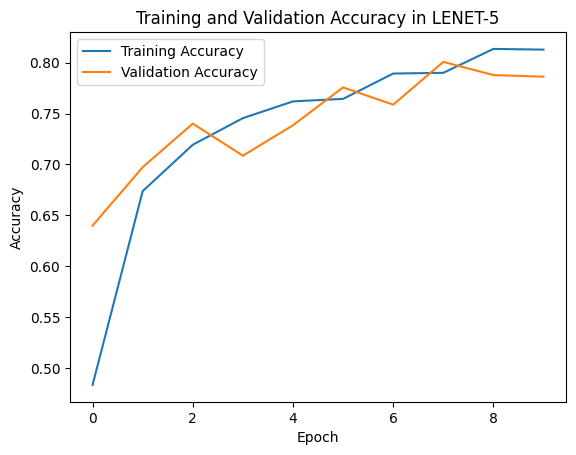

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy in LENET-5')
plt.show()

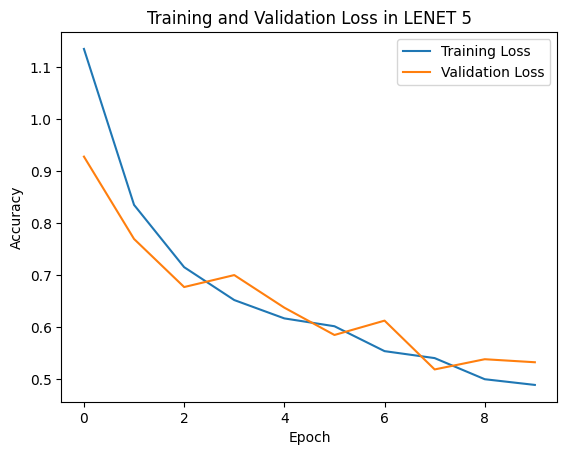

In [50]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Loss in LENET 5')
plt.show()